In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
169931,169932,Male,24,1.0,28,0.0,< 1 Year,No,52915.0,152.0,185,0
121355,121356,Male,26,1.0,20,1.0,< 1 Year,No,2630.0,152.0,281,0
153042,153043,Male,40,1.0,28,1.0,1-2 Year,No,27643.0,124.0,289,0
158952,158953,Female,23,1.0,6,1.0,< 1 Year,No,15973.0,152.0,204,0
258411,258412,Male,33,1.0,31,1.0,< 1 Year,No,2630.0,152.0,112,0


In [5]:
test.sample(5) 

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
5458,386568,Female,23,1,12.0,1,< 1 Year,No,27307.0,152.0,73
44809,425919,Female,23,1,22.0,1,< 1 Year,No,27844.0,152.0,115
83796,464906,Female,58,1,8.0,0,1-2 Year,Yes,43069.0,7.0,245
74529,455639,Female,22,1,46.0,1,< 1 Year,No,25441.0,160.0,86
79687,460797,Female,51,1,46.0,0,> 2 Years,Yes,2630.0,156.0,114


In [6]:
train.shape

(381109, 12)

In [7]:
test.shape

(127037, 11)

## Checking if any values are missing in train data set

In [8]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         1
Region_Code             0
Previously_Insured      1
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          2
Policy_Sales_Channel    1
Vintage                 0
Response                0
dtype: int64

Filling NaN values

In [9]:
train['Driving_License'].fillna((train['Driving_License'].mode()[0]), inplace=True)
train['Previously_Insured'].fillna((train['Previously_Insured'].mode()[0]), inplace=True)
train['Annual_Premium'].fillna((train['Annual_Premium'].mean()), inplace=True)
train['Policy_Sales_Channel'].fillna((train['Policy_Sales_Channel'].median()), inplace=True)

In [10]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### No missing values in train data set

## Numerical Description of the datasets

In [135]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [136]:
numerical = ['Age', 'Previously_Insured', 'Annual_Premium', 'Vintage']

In [137]:
train[numerical].describe()

,Age,Previously_Insured,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.458210,30564.389581,154.347397
std,15.511611,0.498251,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,0.000000,24405.000000,82.000000
50%,36.000000,0.000000,31669.000000,154.000000
75%,49.000000,1.000000,39400.000000,227.000000
max,85.000000,1.000000,540165.000000,299.000000


### Count Plot of Responses

Response being they have taken vehicle insurance or not

0 - Did not buy vehicle insurance \
1 - Bought vehicle insurance

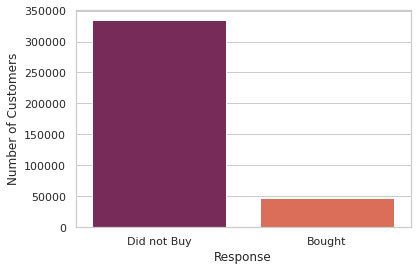

In [138]:
countPlot = sns.countplot(train['Response'], palette="rocket")
countPlot.set_ylabel('Number of Customers')
countPlot.set_xticklabels(['Did not Buy', 'Bought'], rotation=0 )
plt.show(countPlot)

In [139]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

### Distribution Plot of Ages of Customers

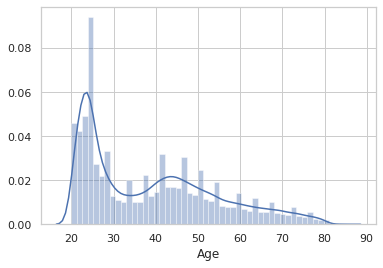

In [140]:
cnp1=sns.distplot(train['Age'])
plt.show(cnp1)
# y axis - probability of age
# x axis - age

### Finding outliers by Age

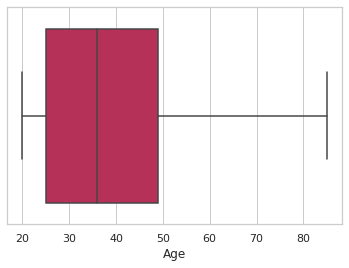

In [141]:
cnp2 = sns.boxplot(x='Age', data=train, palette="rocket")
plt.show(cnp2)

### Observation
- No Outliers for age 

## Correlation Matrix

[Text(0.5, 0, 'id'),
 Text(1.5, 0, 'Age'),
 Text(2.5, 0, 'Driving_License'),
 Text(3.5, 0, 'Region_Code'),
 Text(4.5, 0, 'Previously_Insured'),
 Text(5.5, 0, 'Annual_Premium'),
 Text(6.5, 0, 'Policy_Sales_Channel'),
 Text(7.5, 0, 'Vintage'),
 Text(8.5, 0, 'Response')]

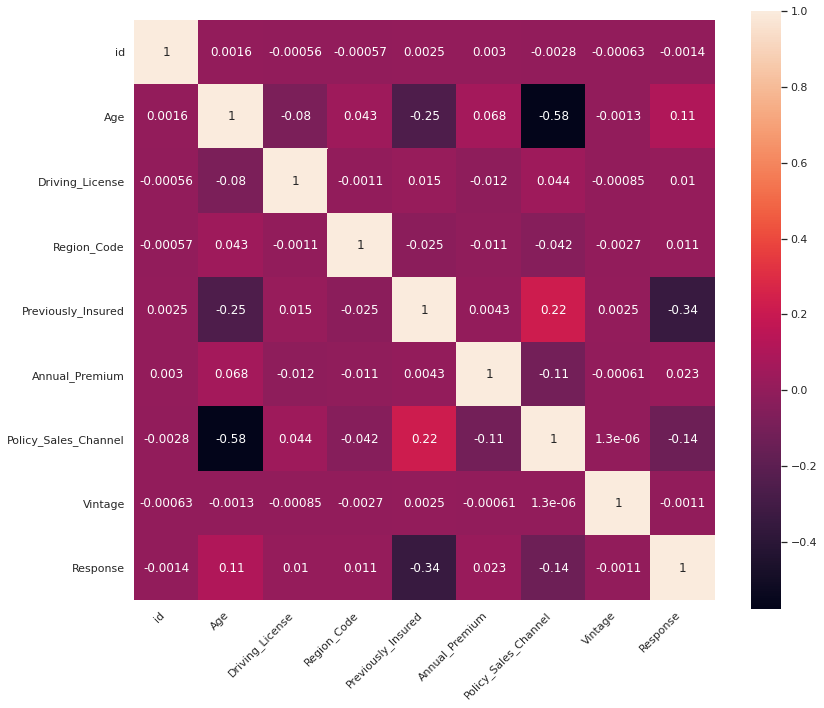

In [27]:
plt.figure(figsize=(13,11))
corr = train.corr()
ax = sns.heatmap(
    corr,
    square=True,
    cmap="rocket",
    annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    
)

Observations:
- Vintage
- Previously Issured - -ve 


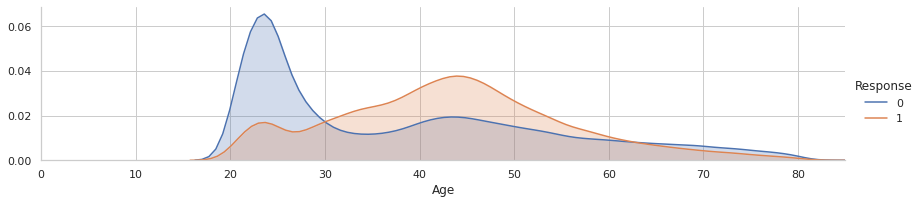

In [28]:
facet = sns.FacetGrid(train,hue="Response",aspect = 4)
facet.map(sns.kdeplot,"Age",shade = True)
facet.set(xlim = (0,train["Age"].max()))
facet.add_legend()
plt.show()

Observation:
    - People b/w around age 39 to 50 are very likely to give a response
    - b/w 20-30 least likely

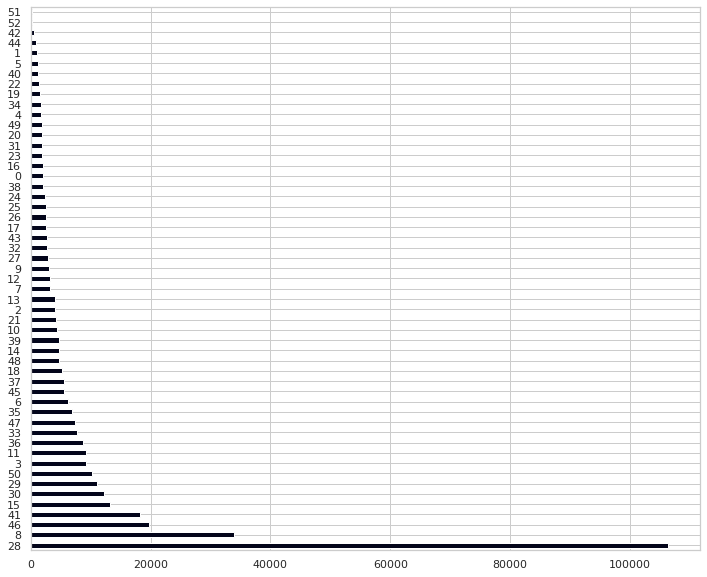

In [29]:
train['Region_Code'].value_counts().plot(kind='barh',cmap='rocket',figsize=(12,10))

Observation: 
- Too many area codes from one place and very few from others
- Not very useful

### Plotting Age with label encoded data

In [11]:
def brac(x):
    if (x>=20) & (x<31):
        return '20-30'
    if(x>=31) & (x<41):
        return '31-40'
    if(x>=41) & (x<51):
        return '41-50'
    if(x>=51) & (x<61):
        return '51-60'
    if(x>=61) & (x<71):
        return '61-70'
    if(x>=71) & (x<81):
        return '71-80'
    if(x>=81) & (x<91):
        return '81-90'

In [13]:
train_LabelAge = train
train_LabelAge['AgeBracket']=train['Age'].apply(brac)

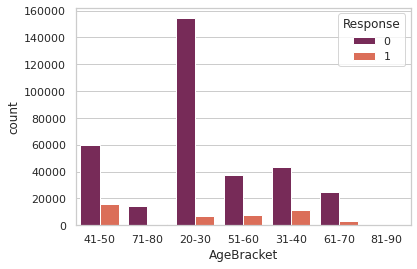

In [14]:
cnp11=sns.countplot('AgeBracket',data=train_LabelAge,hue='Response', palette="rocket")
plt.show(cnp11)

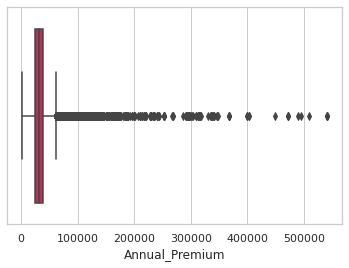

In [19]:
sns.boxplot(x = 'Annual_Premium', data = train,palette='rocket')

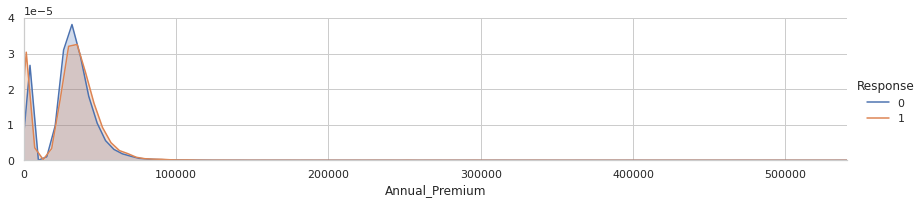

In [30]:
facet = sns.FacetGrid(train,hue="Response",aspect = 4)
facet.map(sns.kdeplot,"Annual_Premium",shade = True)
facet.set(xlim = (0,train["Annual_Premium"].max()))
facet.add_legend()
plt.show()

Observation:
- Very big range of premiums
- Most likely to get a response if annual premiums is between 80,000 to 100,000

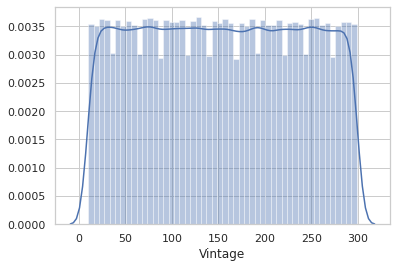

In [22]:
sns.distplot(train.Vintage)

Observation: 
- Fairly balanced distribution graph

## Comparing Age with Annual Premium

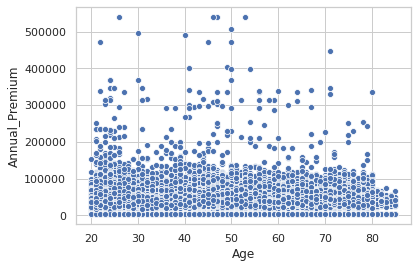

In [142]:
cnp3=sns.scatterplot(x=train['Age'], y=train['Annual_Premium'], palette="rocket")
plt.show(cnp3)

## Comparision By Gender

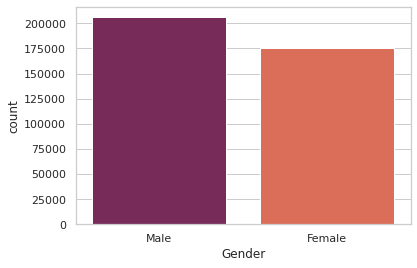

In [143]:
sns.countplot(train['Gender'], palette = "rocket")

In [144]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

We have a slightly higher number of males than females in our training dataset

## Comparing their Responses (Responses based on Gender)

In [145]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

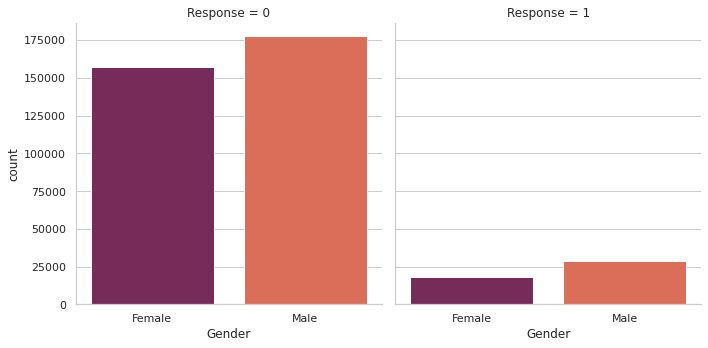

In [146]:
g = sns.catplot(x="Gender", y="count",col="Response",data=df, kind="bar", palette="rocket");

## Comparing Driving licenses by Gender

In [147]:
df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [148]:
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


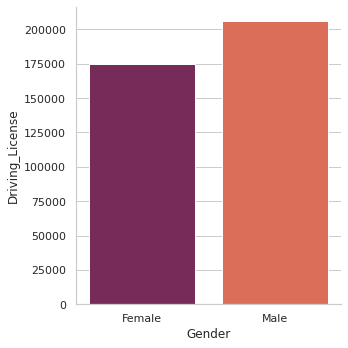

In [149]:
sns.catplot(x="Gender", y="Driving_License", data=df, kind="bar", palette="rocket");

## Age Gender Violin Plot

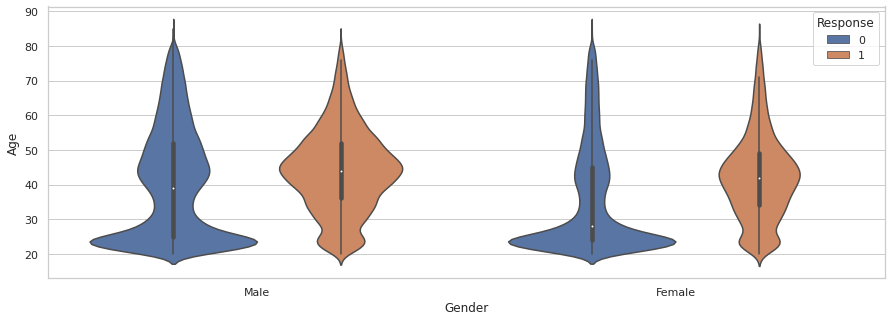

In [23]:
plt.figure(figsize=(15,5))
cnp13=sns.violinplot(y='Age', x ='Gender', hue="Response", data=train)
plt.show(cnp13)

## Customers who already have vehicle insurance

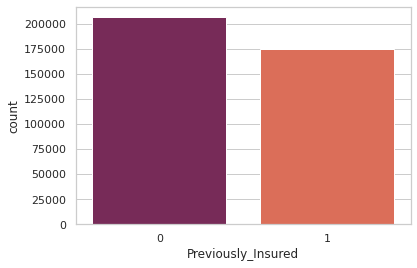

In [150]:
cnp4=sns.countplot(train.Previously_Insured, palette="rocket")
plt.show(cnp4)

## Age of the Vehicle

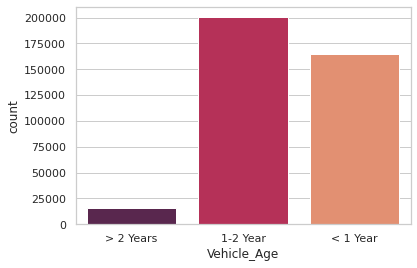

In [151]:
cnp5=sns.countplot(train.Vehicle_Age, palette="rocket")
plt.show(cnp5)

## Response with respect to vehicle age

#### Label Encoding

In [152]:
train.loc[train['Gender'] == 'Male', 'Gender'] = 1
train.loc[train['Gender'] == 'Female', 'Gender'] = 0
test.loc[test['Gender'] == 'Male', 'Gender'] = 1
test.loc[test['Gender'] == 'Female', 'Gender'] = 0

train.loc[train['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
train.loc[train['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
train.loc[train['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0
test.loc[test['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
test.loc[test['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
test.loc[test['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

train.loc[train['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
train.loc[train['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0
test.loc[test['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
test.loc[test['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

In [153]:
train.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
4188,4189,0,46,1,43.0,0,1,1,53808.0,124.0,36,0
276064,276065,0,45,1,46.0,1,1,0,40620.0,124.0,13,0
231794,231795,1,36,1,28.0,1,1,1,58872.0,124.0,152,0
350138,350139,0,50,1,28.0,1,1,0,31657.0,124.0,40,0
61959,61960,1,22,1,36.0,1,0,0,35099.0,152.0,91,0


In [154]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,0,0,157584
1,0,1,7202
2,1,0,165510
3,1,1,34806
4,2,0,11305
5,2,1,4702


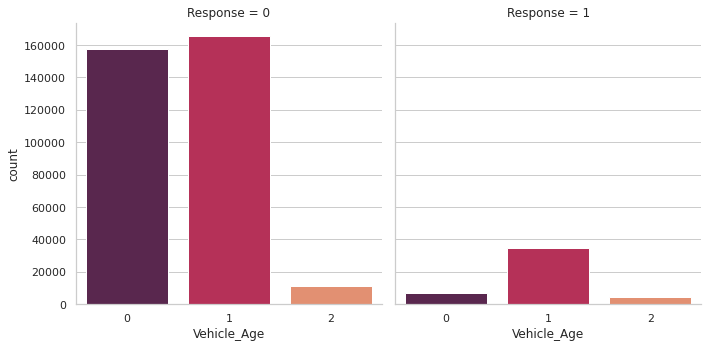

In [155]:
cnp10=sns.catplot(x="Vehicle_Age", y="count",col="Response",data=df, kind="bar", palette="rocket");

plt.show(cnp10);

## Number of vehicles damaged

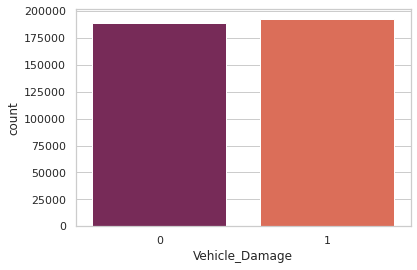

In [156]:
cnp6=sns.countplot(train.Vehicle_Damage, palette="rocket")
plt.show(cnp6)

## Response with respect to vehicle damage

In [157]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Damage,Response,count
0,0,0,187714
1,0,1,982
2,1,0,146685
3,1,1,45728


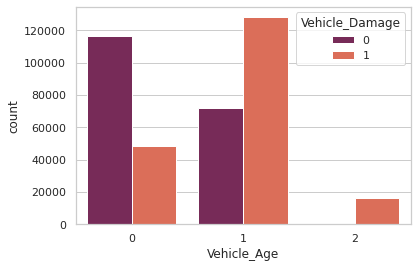

In [158]:
cnp7=sns.countplot('Vehicle_Age',hue='Vehicle_Damage',data=train, palette="rocket")
plt.show(cnp7)

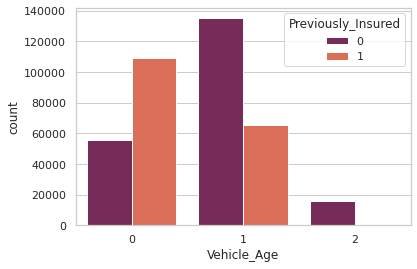

In [159]:
cnp8=sns.countplot('Vehicle_Age',hue='Previously_Insured',data=train, palette="rocket")
plt.show(cnp8)

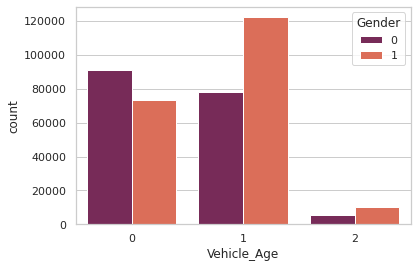

In [160]:
cnp9=sns.countplot('Vehicle_Age',hue='Gender',data=train, palette="rocket")
plt.show(cnp9)